<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/Socio_Economic_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing a Socio-Economic Index for Term Desposit Subscribers

**Executive Problem:**
There are a bunch of social and economic indicators in the data. We should be careful about how we consider these. We may want to see separate models for times when, for example, the consumer confidence index is high compared to when it is low. We'll definitely want to know if it's better to use a particular model during different economic situations.

## Import Libraries

In [ ]:
# import libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import seaborn as sns 
# Set some default styling
sns.set()
# Choose a theme
sns.set_style('ticks')

alt.data_transformers.disable_max_rows()

from sklearn.model_selection import train_test_split

## Load the Data

In [ ]:
# Load the dataset
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## Same Scale Fit

Change all the socio economic features to same scale.

In [ ]:
# transform data for the same scale fit

# Create an instance of the transform object we're going to use
scaler = MinMaxScaler()

campaign['emp.var.rate.scaled'] = scaler.fit_transform(campaign[ ['emp.var.rate'] ])
campaign['cons.price.idx.scaled'] = scaler.fit_transform(campaign[ ['cons.price.idx'] ])
campaign['cons.conf.idx.scaled'] = scaler.fit_transform(campaign[['cons.conf.idx']])
campaign['euribor3m.scaled'] = scaler.fit_transform(campaign[ ['euribor3m'] ])
campaign['nr.employed.scaled'] = scaler.fit_transform(campaign[ ['nr.employed'] ])

campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735


## Principal Component Analysis to obtain an Socio-economic Index



```
https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
```

In [ ]:
#define the matrix for PCA (dimension reduction)
socio_economic_features = ['emp.var.rate.scaled', 'cons.price.idx.scaled', 'cons.conf.idx.scaled',  'euribor3m.scaled', 'nr.employed.scaled' ]
socio_X = campaign[socio_economic_features]
socio_y = campaign['y']
socio_X.head()

,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled
0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.9375,0.698753,0.60251,0.957379,0.859735



```
Note:
Cange the pca = PCA(4) to see the eigenvalues and eigenvectors of the other principal component. The first component is required for an index. 
```

In [ ]:
#create the PCA instance
pca = PCA(1)
pca.fit(socio_X)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_ )

[[-0.54480527 -0.28203894 -0.07493063 -0.65717956 -0.4314414 ]]
[0.35359577]


In [ ]:
# transform data
score_socio_X = pca.transform(socio_X)
print(score_socio_X)

[[-0.3975936 ]
 [-0.3975936 ]
 [-0.3975936 ]
 ...
 [ 0.75368673]
 [ 0.75368673]
 [ 0.75368673]]




```
Note: this is a numpy array
```



In [ ]:
# convert numpy array to a dataframe
campaign_socio_economic = pd.DataFrame(score_socio_X, columns = ['socio_economic_idx'])
campaign_socio_economic.head()

,socio_economic_idx
0,-0.397594
1,-0.397594
2,-0.397594
3,-0.397594
4,-0.397594


## Charts

Histogram chart shows there are 3 modes in the data which indicates that we should split the data into the 3 different datasets to model for different socio economic time periods.

Text(0.5, 0, 'Socio Economic Index')

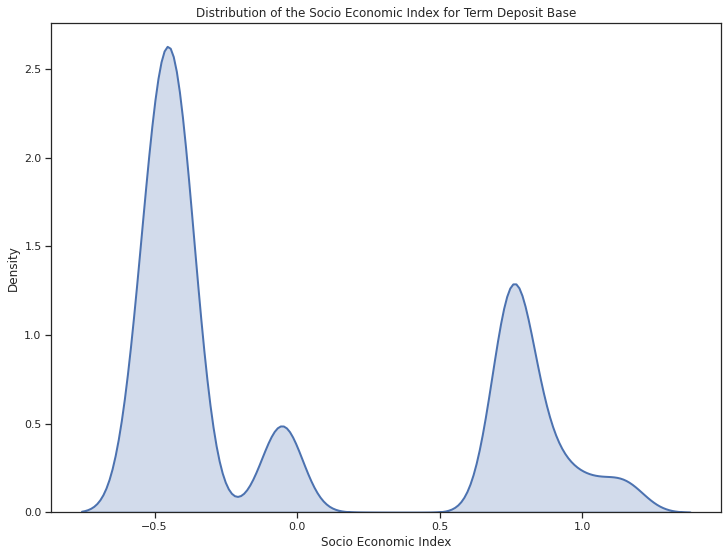

In [ ]:
#presentation style
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
ax = sns.kdeplot(x=campaign_socio_economic['socio_economic_idx'], shade=True, linewidth=2)
ax.set_title("Distribution of the Socio Economic Index for Term Deposit Base")
ax.set_xlabel("Socio Economic Index")

We see 3 modes in the data. The bar chart below shows where to to cut-off high, medium and low.

In [ ]:
alt.Chart(campaign_socio_economic).mark_bar().encode(
    alt.X('socio_economic_idx', title='Socio Economic Index'),
    alt.Y('count(socio_economic_idx)', title='Number of Leads with Index'),
    alt.Color('socio_economic_idx', legend=None)
).properties(
    title='Term Deposit Subscription Lead Base',
    width=600
)

alt.Chart(...)

## New Feature to Separate Models

In [ ]:
# create new High and Low indicator for Socio Economic Index
# Define a function that takes converts the socio-economic indicator to high, medium and low 
def assignNewLabels(label):
    if label >=  0.5:
        return 'High'
    elif label <= -0.1 :
        return 'Low'
    else:
        return 'Medium'
    
campaign_socio_economic['socio_economic_idx_labels'] = campaign_socio_economic['socio_economic_idx'].apply(assignNewLabels)
print(campaign_socio_economic.head())
print(campaign_socio_economic['socio_economic_idx_labels'].value_counts())


   socio_economic_idx socio_economic_idx_labels
0           -0.397594                       Low
1           -0.397594                       Low
2           -0.397594                       Low
3           -0.397594                       Low
4           -0.397594                       Low
Low       24090
High      13498
Medium     3600
Name: socio_economic_idx_labels, dtype: int64


## Master Data File

We should use this file for our models.

In [ ]:
#append index dataframe to orginal dataframe

campaign_idx = pd.concat([campaign, campaign_socio_economic], axis=1)
campaign_idx.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled,socio_economic_idx,socio_economic_idx_labels
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low


### Adding new features

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


In [ ]:
# previous campaign indicator for data filtering
def assignIndicator(label):
    if label != 999:
        return 'Yes'
    else:
        return 'No'

campaign_idx['previously_contacted_ind'] = campaign_idx['pdays'].apply(assignIndicator)
print(campaign_idx['previously_contacted_ind'].value_counts())

No     39673
Yes     1515
Name: previously_contacted_ind, dtype: int64


poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

In [ ]:
# Previous Campaign Indicator for data filtering
def assignPreviousCampaign(label):
    if label == 'success' or  label == 'failure':
        return 'Yes'
    else:
        return 'No'

campaign_idx['previous_campaign_ind'] = campaign_idx['poutcome'].apply(assignPreviousCampaign)
print(campaign_idx['previous_campaign_ind'].value_counts())


No     35563
Yes     5625
Name: previous_campaign_ind, dtype: int64


The above indicator should be used to keep customers who were on the previous campaign to answer the executives first objection about what was significant features. Run model off this base only.

## Split Train and Test


Categorical variables can be dummy coded prior to train and test split as they are not dependent on sample statistics such as a mean, standard deviation or range that adjust depending on the sample.

In [ ]:
campaign_idx['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [215]:
# Encode features and target as neeed
cat_features = ['job','marital', 'education', 'default', 'housing', 'loan', 'previously_contacted_ind', 'socio_economic_idx_labels']
cat_campaign = pd.get_dummies(campaign_idx[cat_features], drop_first = False)
cat_campaign.head()
X = pd.concat([campaign_idx[['age', 'campaign']], cat_campaign], axis=1)
y = campaign_idx['y']
#print(X.head())
#print(y.head())

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               41188 non-null  int64
 1   campaign                          41188 non-null  int64
 2   job_admin.                        41188 non-null  uint8
 3   job_blue-collar                   41188 non-null  uint8
 4   job_entrepreneur                  41188 non-null  uint8
 5   job_housemaid                     41188 non-null  uint8
 6   job_management                    41188 non-null  uint8
 7   job_retired                       41188 non-null  uint8
 8   job_self-employed                 41188 non-null  uint8
 9   job_services                      41188 non-null  uint8
 10  job_student                       41188 non-null  uint8
 11  job_technician                    41188 non-null  uint8
 12  job_unemployed                  

11,3% of the data says yes to campaign

 #keep the proportion of y values through the training and test sets, then pass stratify=y, use random_state to reproduce results

In [216]:
campaign_idx.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled,socio_economic_idx
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.004304
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.145829
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.290344
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.445930
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,1.000000,0.775334,0.196041,0.972245,0.906970,-0.989854
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.775334,1.000000,0.058986,0.688230,0.522034,-0.743465
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.196041,0.058986,1.000000,0.277686,0.100513,-0.230091
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.972245,0.688230,0.277686,1.000000,0.945154,-0.993833
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.906970,0.522034,0.100513,0.945154,1.000000,-0.939191
emp.var.rate.scaled,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,1.000000,0.775334,0.196041,0.972245,0.906970,-0.989854


In [217]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 12, stratify = y)

### Imbalanced sample

11.3% responses are yes in the training set.

Undersampling/oversampling will be done on train split only, this is the correct approach.

In [182]:
keep_features = ['']

### **No** balancing & no same scale fit

In [218]:
y_train.value_counts()

no     25583
yes     3248
Name: y, dtype: int64

In [219]:
# 
importance = ['age','previously_contacted_ind_Yes','campaign','socio_economic_idx_labels_High','loan_no', 'housing_yes', 'marital_married', 'marital_single', 'education_university.degree']
X_train = X_train[importance]
X_test = X_test[importance]


In [220]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it 
clf.score(X_test, y_test)

0.881443716112325

In [221]:
# make the prediction using the resulting model
target_predicted = clf.predict(X_test)
target_proba = clf.predict_proba(X_test)

In [ ]:
# print all the confusion matrix values
from sklearn import metrics
print("Decision tree Confusion Matrix")
metrics.plot_confusion_matrix(clf, X_test, y_test)
print(metrics.confusion_matrix(y_test, target_predicted))
print(metrics.accuracy_score(y_test, target_predicted))
print(metrics.classification_report(y_test, target_predicted))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


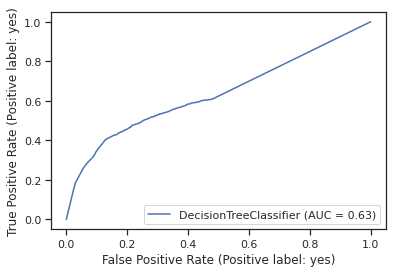

In [223]:
#plot the roc curve
metrics.plot_roc_curve(clf, X_test, y_test)

In [224]:
#paredo chart of features by feature importance by f_value
df_features = pd.DataFrame(
{'f_names': X_train.columns,
'f_values': clf.feature_importances_}).sort_values('f_values', ascending = False)
pareto_clf = (alt.Chart(df_features.query('f_values > .02'))
.encode(
alt.X('f_values'),
alt.Y('f_names', sort = '-x'))
.mark_bar()
.properties(width=700, height =600,
title='Feature Importance for Decision Tree Classifier'))
pareto_clf

alt.Chart(...)

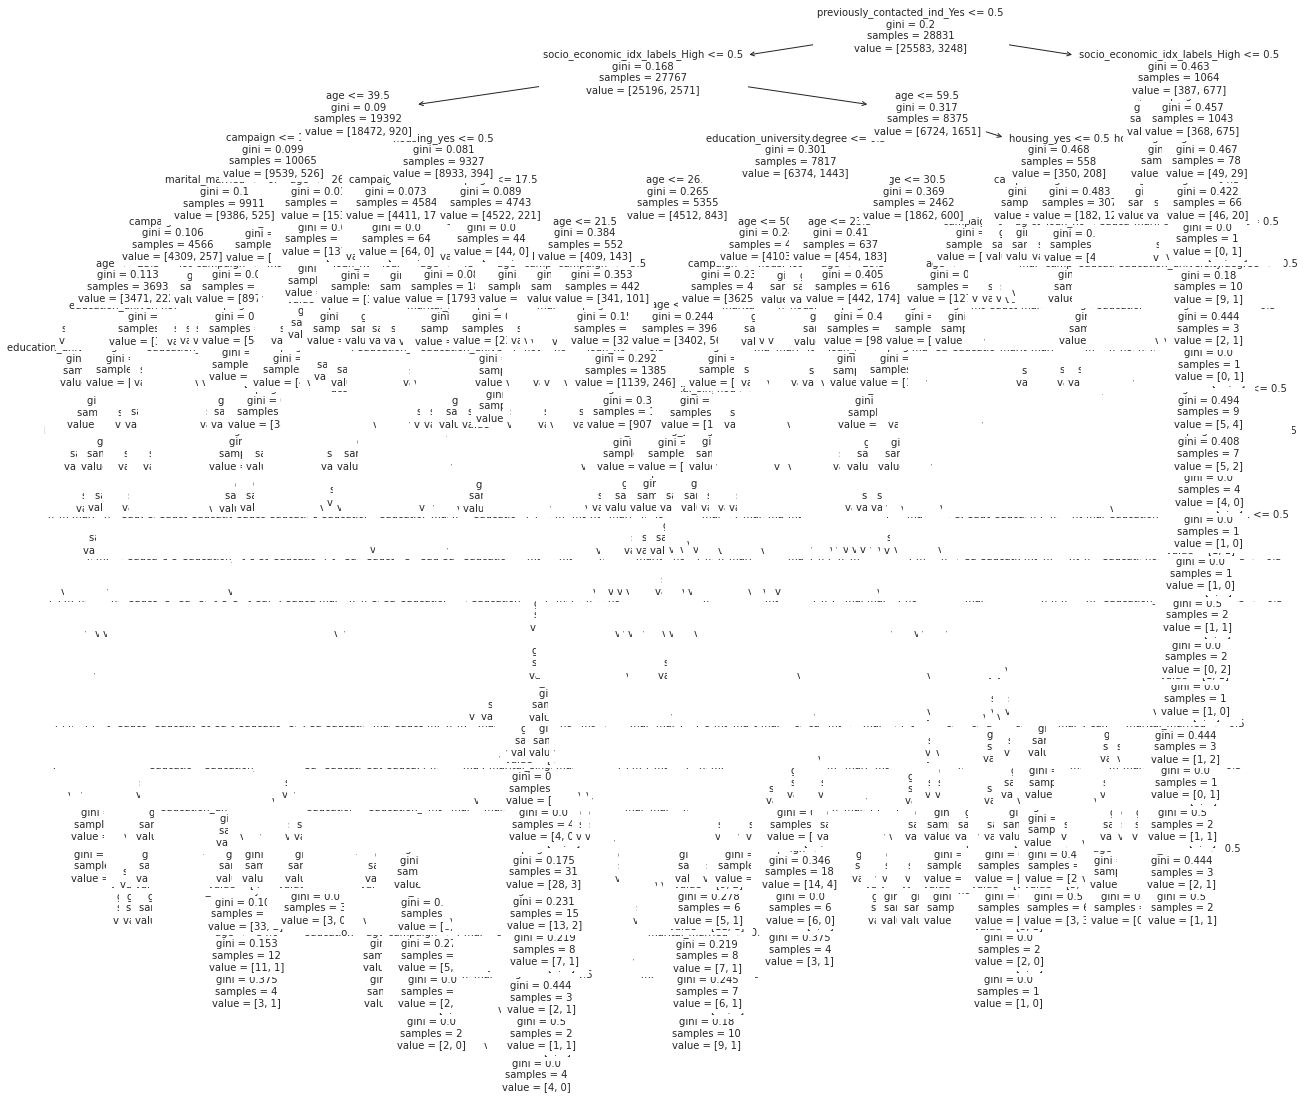

In [226]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=5, feature_names=X_train.columns)
plt.show()

In [ ]:
features = ['age','','','','','','','','','']

In [ ]:
# transform data for the same scale fit

# Create an instance of the transform object we're going to use
X_train['age_scaled']= scaler.fit_transform(X_train[ ['age'] ])
X_train['campaign_scaled']= scaler.fit_transform(X_train[ ['campaign'] ])
X_train['previous_scaled']= scaler.fit_transform(X_train[ ['previous'] ])
X_train2 = X_train.drop(columns=['age','campaign', 'previous', ''])

In [227]:
# transform data for the same scale fit

# Create an instance of the transform object we're going to use
X_test['age_scaled']= scaler.fit_transform(X_test[ ['age'] ])
X_test['campaign_scaled']= scaler.fit_transform(X_test[ ['campaign'] ])
X_test['previous_scaled']= scaler.fit_transform(X_test[ ['previous'] ])
X_test2 = X_test.drop(columns=['age','campaign', 'previous', ])


KeyError: ignored